<a href="https://colab.research.google.com/github/Aminechawi/my-project/blob/main/Pima_indai_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS IS A KNN CLASSIFEIR


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.astype(bool).sum(axis=0)  #non_ziro values

Pregnancies                 657
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     268
dtype: int64

In [ ]:
median_BMI = data['BMI'].median()
data['BMI']=data['BMI'].replace(to_replace=0, value=median_BMI)

median_Glucose=data['Glucose'].median()
data['Glucose']=data['Glucose'].replace(to_replace=0,value=median_Glucose)

median_BloodPressure = data['BloodPressure'].median()
data['BloodPressure']=data['BloodPressure'].replace(to_replace=0,value=median_BloodPressure)

median_SkinThickness=data['SkinThickness'].median()
data['SkinThickness']=data['SkinThickness'].replace(to_replace=0,value=median_SkinThickness)

median_Insulin = data['Insulin'].median()
data['Insulin']=data['Insulin'].replace(to_replace=0,value=median_Insulin)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [ ]:
y = data['Outcome'].values
x = data.drop('Outcome',axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state=42 , stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2 )
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca= pca.transform(X_test)

In [ ]:
X_train_pca.shape

(614, 2)

Text(0, 0.5, 'PCA2')

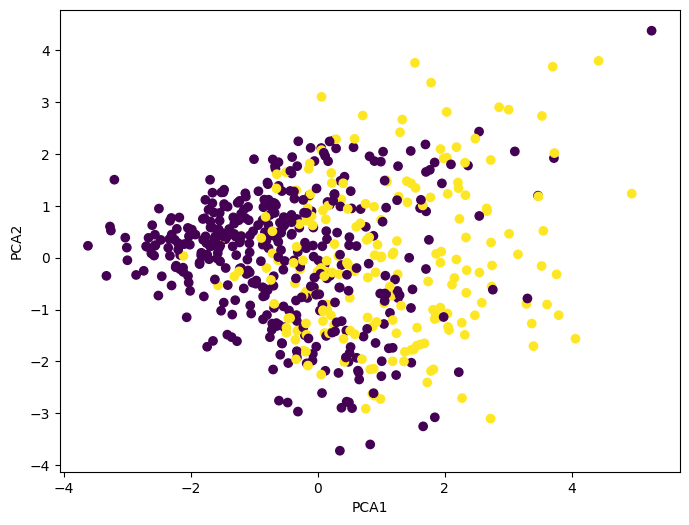

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [ ]:
print(neighbors)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


In [ ]:
for i , k in enumerate (neighbors) :
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_pca,y_train)
  train_accuracy[i]=knn.score(X_train_pca,y_train)
  test_accuracy[i]=knn.score(X_test_pca,y_test)

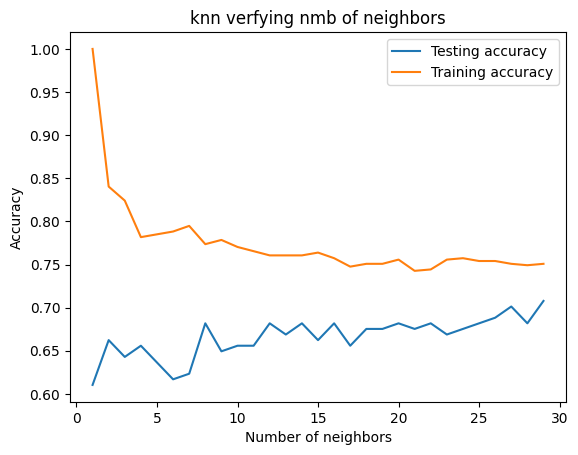

In [ ]:
plt.title('knn verfying nmb of neighbors')
plt.plot(neighbors , test_accuracy, label='Testing accuracy')
plt.plot(neighbors , train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
 knn = KNeighborsClassifier(n_neighbors=26)
 knn.fit(X_train_pca,y_train)
 knn.score(X_test_pca,y_test)

0.6883116883116883

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred= knn.predict(X_test_pca)
confusion_matrix(y_test,y_pred)

array([[82, 18],
       [30, 24]])

In [ ]:
expliend_varience = pca.explained_variance_ratio_
print(expliend_varience )

[0.27885737 0.20717301]


In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

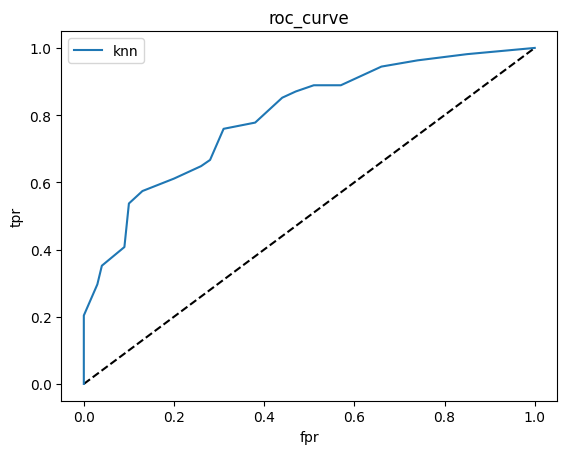

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='knn')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7962962962962963